In [8]:
import pandas as pd
import numpy as np


Загружаем данные


In [9]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
train_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Колонка TotalSpent имеет тип object, хотя признак числовой. Необходимо изменить.

In [18]:
train_data['TotalSpent']=pd.to_numeric(train_data['TotalSpent'],errors = 'coerce')
test_data['TotalSpent']=pd.to_numeric(test_data['TotalSpent'],errors = 'coerce')

In [20]:
numeric_indices = np.array([0,1,2])
categorical_indices = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
train_data['TotalSpent'].fillna(train_data['TotalSpent'].median(),inplace=True)
test_data['TotalSpent'].fillna(test_data['TotalSpent'].median(),inplace=True)
numeric_data = train_data[train_data.columns[numeric_indices]]
categorical_data = train_data[train_data.columns[categorical_indices]]


Визуализируем данные

In [21]:
import seaborn as sns

In [22]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [23]:
from matplotlib import pyplot as plt

array([[<AxesSubplot:title={'center':'ClientPeriod'}>,
        <AxesSubplot:title={'center':'MonthlySpending'}>],
       [<AxesSubplot:title={'center':'TotalSpent'}>, <AxesSubplot:>]],
      dtype=object)

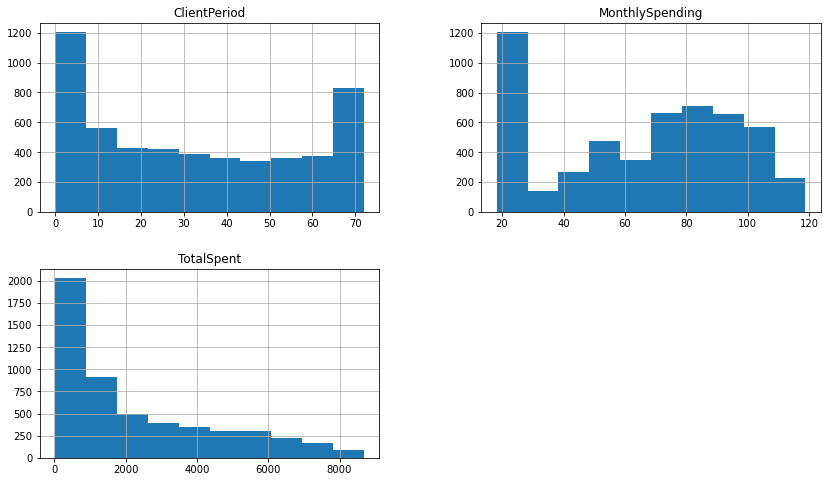

In [24]:
train_data.hist(column = num_cols, figsize = (14,8))

In [25]:
out = list()
for column in cat_cols:
    out.append([column, train_data[column].nunique(), dict(train_data[column].value_counts())])
pd.DataFrame(out, columns=['column', 'num_uniq', 'count_uniq'])

,column,num_uniq,count_uniq
0,Sex,2,"{'Male': 2655, 'Female': 2627}"
1,IsSeniorCitizen,2,"{0: 4440, 1: 842}"
2,HasPartner,2,"{'No': 2705, 'Yes': 2577}"
3,HasChild,2,"{'No': 3676, 'Yes': 1606}"
4,HasPhoneService,2,"{'Yes': 4761, 'No': 521}"
5,HasMultiplePhoneNumbers,3,"{'No': 2511, 'Yes': 2250, 'No phone service': ..."
6,HasInternetService,3,"{'Fiber optic': 2341, 'DSL': 1800, 'No': 1141}"
7,HasOnlineSecurityService,3,"{'No': 2612, 'Yes': 1529, 'No internet service..."
8,HasOnlineBackup,3,"{'No': 2332, 'Yes': 1809, 'No internet service..."
9,HasDeviceProtection,3,"{'No': 2317, 'Yes': 1824, 'No internet service..."


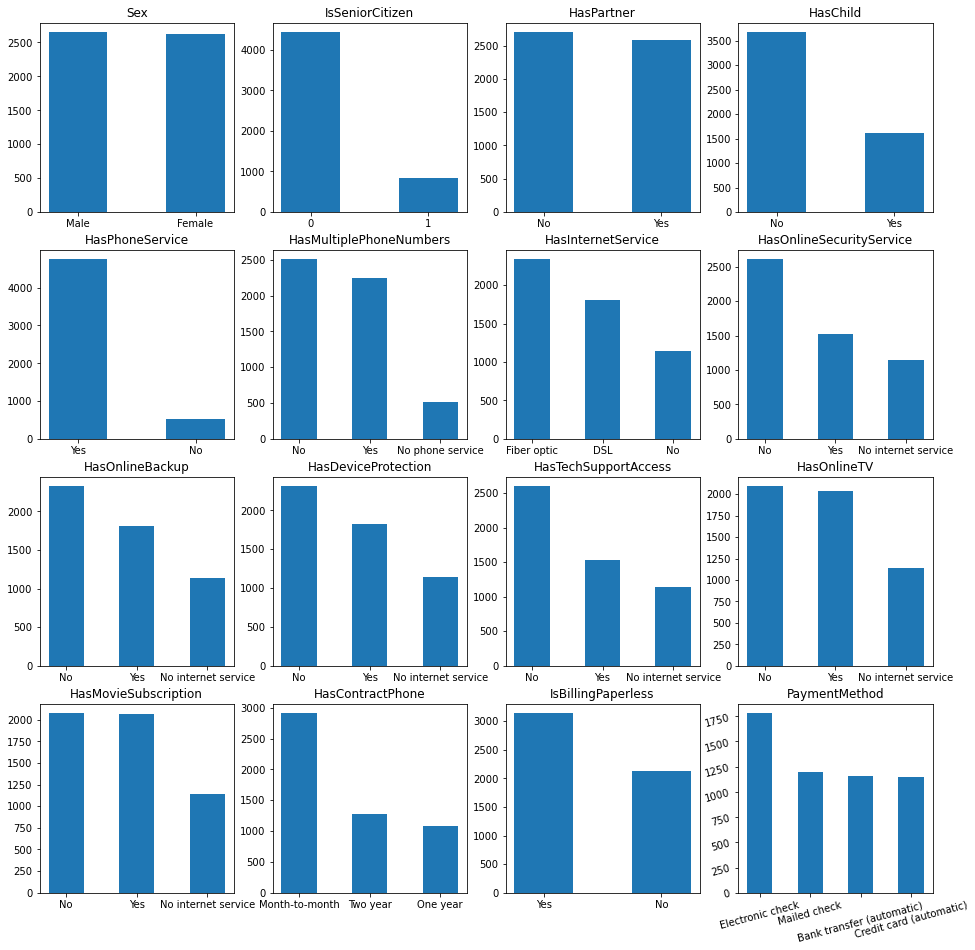

In [26]:
fig, ax = plt.subplots(4, 4, figsize = (16,16))
ax = ax.ravel()
for i, column in enumerate(cat_cols):
    serie = train_data[column].value_counts()
    labels = list(serie.index)
    values = list(serie)
    x = np.arange(len(labels))
    ax[i].set_title(column)
    ax[i].bar(x, values, width = 0.5)
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels)
    if i == 15:
        ax[i].tick_params(labelrotation = 15)

Будем использовать линейные модели


In [37]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [38]:
X = train_data.iloc[:, :-1]
y=train_data.iloc[:, -1]
dummy_features=pd.get_dummies(categorical_data)

scaler=StandardScaler()
numeric_data_scaled=scaler.fit_transform(numeric_data)
X = pd.concat([numeric_data, dummy_features], axis=1)
X.dropna()
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
         
                                           random_state=42)
model=LogisticRegressionCV()
model.fit(X_train,y_train)
train_auc = roc_auc_score(y_train, y_train)
test_auc = roc_auc_score(y_test, y_test)
print(model.score(X_test, y_test),train_auc,test_auc)

C:\Users\ALLA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ALLA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.7842951750236519 1.0 1.0


Применим градиентный бустинг

In [39]:
from sklearn.metrics import accuracy_score, f1_score
import catboost
X_new=pd.concat([numeric_data, categorical_data], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_new.values, y.values, 
                                                    train_size=0.8,random_state=42)
boosting_model = catboost.CatBoostClassifier(learning_rate=0.5,n_estimators=180, 
                                             cat_features=categorical_indices)

boosting_model.fit(X_train, y_train)
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
train_auc = roc_auc_score(y_train,y_train_predicted)
test_auc = roc_auc_score(y_test,y_test_predicted)
print(train_auc,test_auc)

0:	learn: 0.5465316	total: 201ms	remaining: 35.9s
1:	learn: 0.4774227	total: 236ms	remaining: 21s
2:	learn: 0.4469850	total: 282ms	remaining: 16.6s
3:	learn: 0.4278303	total: 332ms	remaining: 14.6s
4:	learn: 0.4159184	total: 374ms	remaining: 13.1s
5:	learn: 0.4076774	total: 430ms	remaining: 12.5s
6:	learn: 0.4038141	total: 449ms	remaining: 11.1s
7:	learn: 0.4001588	total: 485ms	remaining: 10.4s
8:	learn: 0.3957297	total: 525ms	remaining: 9.97s
9:	learn: 0.3921261	total: 566ms	remaining: 9.62s
10:	learn: 0.3908207	total: 609ms	remaining: 9.36s
11:	learn: 0.3882538	total: 662ms	remaining: 9.27s
12:	learn: 0.3877357	total: 714ms	remaining: 9.17s
13:	learn: 0.3864568	total: 775ms	remaining: 9.19s
14:	learn: 0.3859777	total: 829ms	remaining: 9.12s
15:	learn: 0.3853558	total: 902ms	remaining: 9.24s
16:	learn: 0.3835907	total: 981ms	remaining: 9.4s
17:	learn: 0.3818143	total: 1.04s	remaining: 9.4s
18:	learn: 0.3811734	total: 1.1s	remaining: 9.34s
19:	learn: 0.3810737	total: 1.15s	remaining: 9

161:	learn: 0.2906399	total: 8.65s	remaining: 961ms
162:	learn: 0.2903914	total: 8.71s	remaining: 908ms
163:	learn: 0.2901753	total: 8.75s	remaining: 854ms
164:	learn: 0.2894981	total: 8.8s	remaining: 801ms
165:	learn: 0.2892585	total: 8.85s	remaining: 746ms
166:	learn: 0.2880311	total: 8.9s	remaining: 693ms
167:	learn: 0.2867857	total: 8.96s	remaining: 640ms
168:	learn: 0.2853436	total: 9s	remaining: 586ms
169:	learn: 0.2852860	total: 9.05s	remaining: 533ms
170:	learn: 0.2840699	total: 9.09s	remaining: 478ms
171:	learn: 0.2840176	total: 9.14s	remaining: 425ms
172:	learn: 0.2829417	total: 9.21s	remaining: 373ms
173:	learn: 0.2819109	total: 9.26s	remaining: 319ms
174:	learn: 0.2813842	total: 9.31s	remaining: 266ms
175:	learn: 0.2810042	total: 9.35s	remaining: 213ms
176:	learn: 0.2799095	total: 9.4s	remaining: 159ms
177:	learn: 0.2796763	total: 9.44s	remaining: 106ms
178:	learn: 0.2788728	total: 9.48s	remaining: 53ms
179:	learn: 0.2779700	total: 9.52s	remaining: 0us
0.9141932981487204 0.

Предсказания


In [40]:
best_model = boosting_model

In [42]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] =best_model.predict(X_test)
submission.to_csv('./my_submission.csv')